In [2]:
pip install statsmodels dmba

Note: you may need to restart the kernel to use updated packages.


In [3]:

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [4]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = dmba.load_data('ToyotaCorolla.csv')

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
               'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]
# Specify the test size (k-fold)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.5, test_size=0.2, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  8848.588482147628
           Predictor  coefficient
0          Age_08_04  -107.491177
1                 KM    -0.017528
2                 HP    33.071415
3          Automatic   766.968701
4              Doors    94.674687
5      Quarterly_Tax    19.157318
6      Mfr_Guarantee    67.509559
7   Guarantee_Period    89.615520
8              Airco   263.449629
9    Automatic_airco  3304.903882
10         CD_Player   311.520641
11   Powered_Windows   367.352465
12       Sport_Model   303.318459
13           Tow_Bar  -244.231227
14  Fuel_Type_Diesel  2158.632054
15  Fuel_Type_Petrol  2713.296439

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1198.4342
            Mean Absolute Error (MAE) : 925.8616
          Mean Percentage Error (MPE) : -1.0402
Mean Absolute Percentage Error (MAPE) : 9.1081


In [5]:
# Decision Tree?

# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

         Predicted  Actual     Residual
509   12000.963587   10900 -1100.963587
435   10542.111732   10895   352.888268
321   13763.035218   10750 -3013.035218
1055   7130.347996    6500  -630.347996
288   11770.558423   11895   124.441577
48    16579.752862   17950  1370.247138
1403   7603.791752    7000  -603.791752
952    9555.470752    8400 -1155.470752
1097   7834.292023    7250  -584.292023
204   11743.785720   12950  1206.214280
978    9590.182333    8745  -845.182333
404    9860.502080    9450  -410.502080
1338   7485.294148    7499    13.705852
754    9096.774927    9950   853.225073
1189   6894.231551    8500  1605.768449
948    8042.392287    7750  -292.392287
1079   5550.733681    8950  3399.266319
1108   8045.168365    8250   204.831635
107   16261.580115   17450  1188.419885
1065   5959.239162    6550   590.760838

Regression statistics

                      Mean Error (ME) : 155.9311
       Root Mean Squared Error (RMSE) : 1230.5988
            Mean Absolute Error (MAE)

In [6]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

Classes: 4350, 4400, 4450, 4750, 5150, 5250, 5600, 5740, 5750, 5751, 5800, 5845, 5900, 5950, 6000, 6150, 6250, 6400, 6425, 6450, 6490, 6495, 6500, 6550, 6640, 6650, 6750, 6800, 6900, 6950, 6990, 6999, 7000, 7145, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7460, 7490, 7495, 7499, 7500, 7600, 7750, 7795, 7800, 7850, 7900, 7950, 7990, 7995, 7999, 8000, 8050, 8100, 8150, 8200, 8250, 8400, 8450, 8490, 8495, 8500, 8600, 8695, 8700, 8745, 8750, 8800, 8850, 8895, 8900, 8950, 8990, 8995, 9000, 9130, 9200, 9245, 9250, 9390, 9400, 9450, 9475, 9500, 9550, 9650, 9695, 9700, 9750, 9795, 9799, 9800, 9850, 9895, 9900, 9930, 9940, 9950, 9980, 9990, 9995, 10000, 10250, 10295, 10350, 10400, 10450, 10495, 10500, 10600, 10750, 10800, 10845, 10850, 10895, 10900, 10950, 10990, 10995, 11000, 11250, 11290, 11450, 11480, 11495, 11500, 11650, 11690, 11695, 11700, 11710, 11750, 11790, 11895, 11900, 11925, 11930, 11950, 11990, 12000, 12200, 12250, 12295, 12400, 12450, 12495, 12500, 12695, 12750, 12850, 12900, 12950

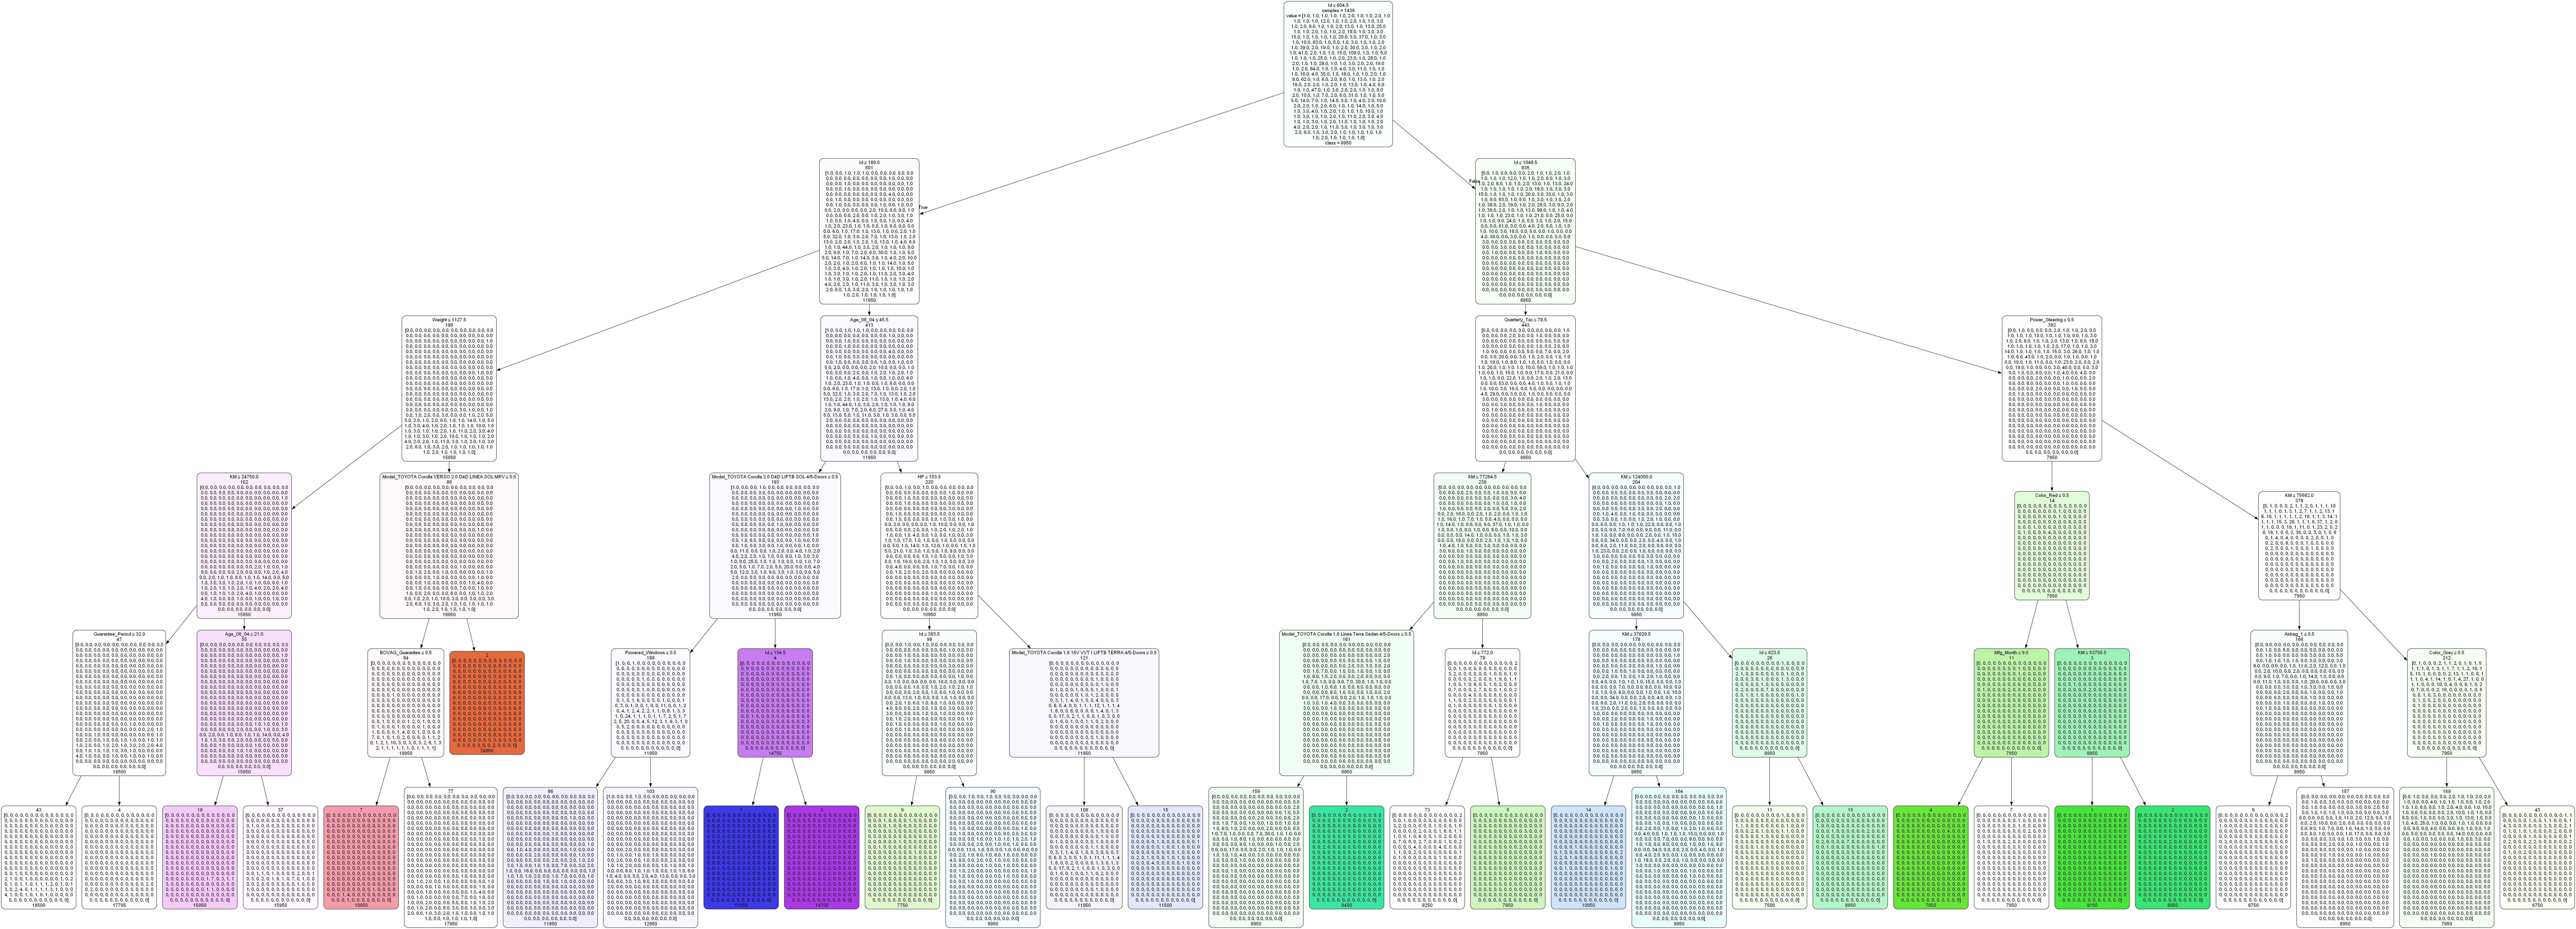

In [7]:
features = car_df.drop(columns=['Price'])
target = car_df['Price'] 


categorical_features = car_df.drop(columns=['Price']).select_dtypes(include=['object'])
features_encoded = pd.get_dummies(categorical_features)
features_final = pd.concat([features.drop(columns=categorical_features.columns), features_encoded], axis=1)

classTree = DecisionTreeClassifier(random_state=0, max_depth=5)
classTree.fit(features_final, target)

class_labels = [str(label) for label in classTree.classes_]

print("Classes: {}".format(', '.join(class_labels)))
plotDecisionTree(classTree, feature_names=features_final.columns, class_names=class_labels)


In [10]:
toyotaCorolla_df = dmba.load_data('ToyotaCorolla.csv')
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 14}


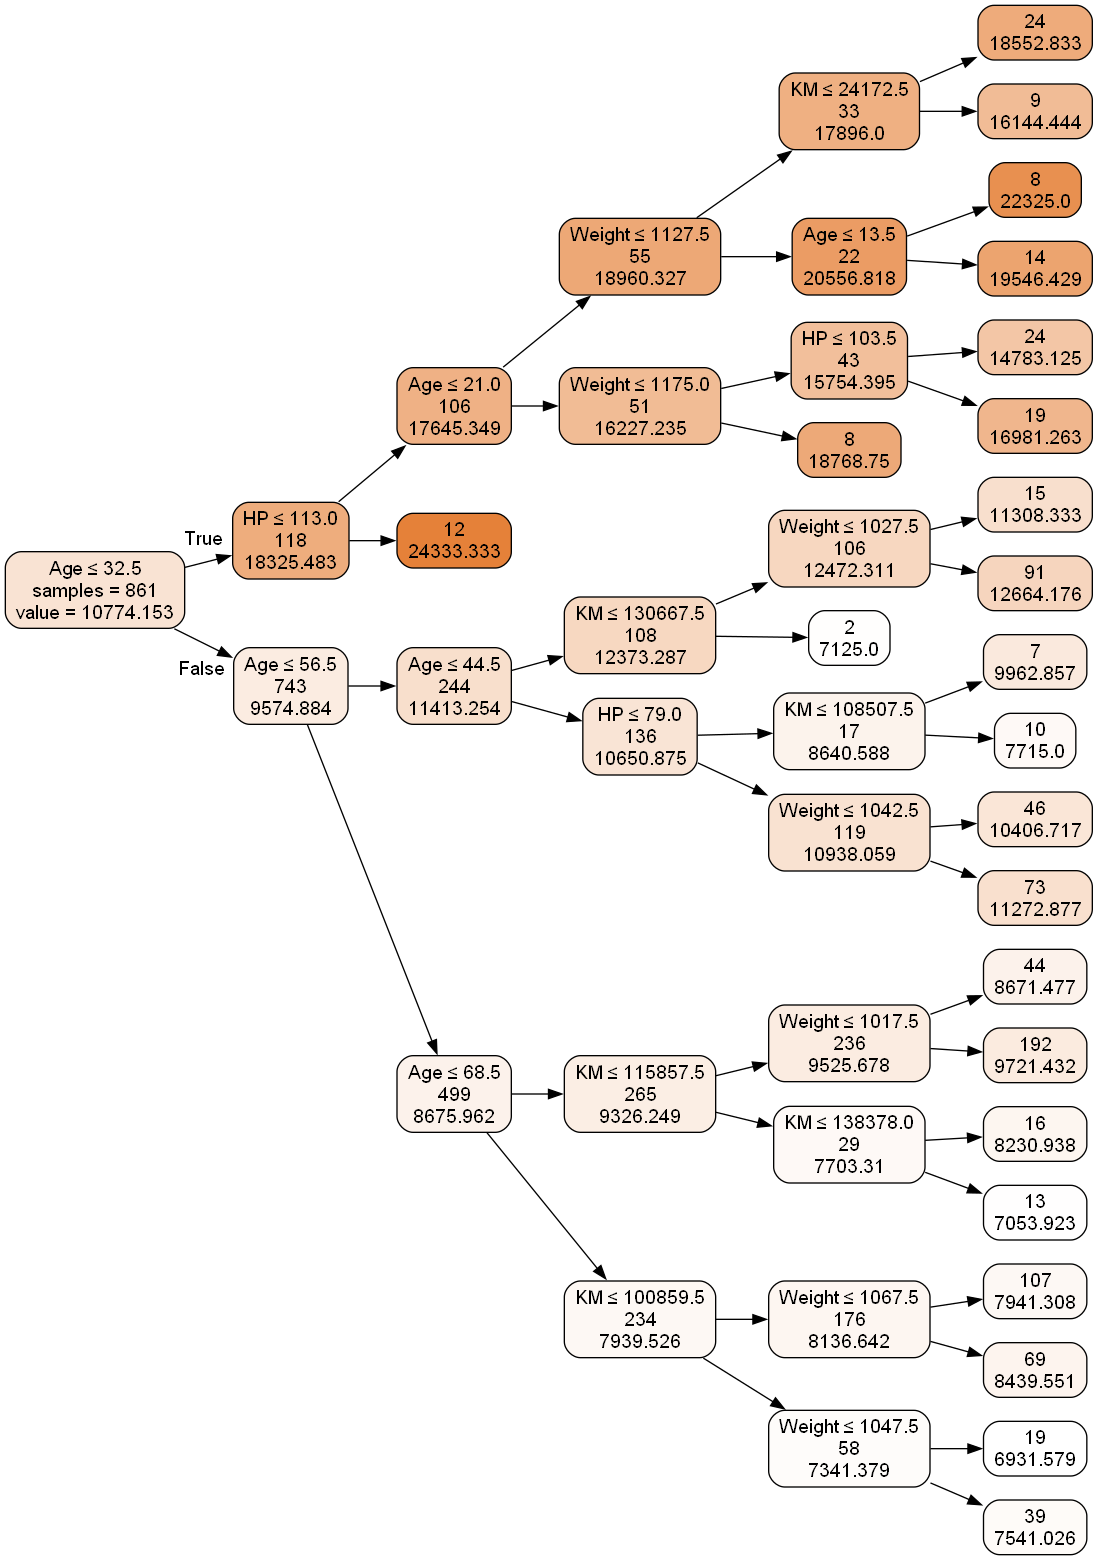

In [11]:
plotDecisionTree(regTree, feature_names=train_X.columns)
plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)